<a href="https://colab.research.google.com/github/JVictor011/Big-Five-Personality-Test/blob/main/Notebooks/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pokedex.csv')

In [3]:
df.head()

,Pokemon Id,Name,Types,Total,Hp,Attack,Defense,Speed Attack,Speed Defense,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65


**Verificação da quantidade de linhas nulas do Data Frame**

In [4]:
df.isnull().sum()

Pokemon Id       0
Name             0
Types            0
Total            0
Hp               0
Attack           0
Defense          0
Speed Attack     0
Speed Defense    0
Speed            0
dtype: int64

**Verificação de data type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pokemon Id     1194 non-null   int64 
 1   Name           1194 non-null   object
 2   Types          1194 non-null   object
 3   Total          1194 non-null   int64 
 4   Hp             1194 non-null   int64 
 5   Attack         1194 non-null   int64 
 6   Defense        1194 non-null   int64 
 7   Speed Attack   1194 non-null   int64 
 8   Speed Defense  1194 non-null   int64 
 9   Speed          1194 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 93.4+ KB


Alguns pokémons possuem IDs iguais, mas como e uma representação de como estes pokémons seriam caso evolução de tal forma o Pokémon Id serve como referência por esse motivo e mantido

In [6]:
df.loc[df['Pokemon Id'].duplicated()]

,Pokemon Id,Name,Types,Total,Hp,Attack,Defense,Speed Attack,Speed Defense,Speed
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
7,6,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
8,6,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
12,9,Blastoise Mega Blastoise,Water,630,79,103,120,135,115,78
19,15,Beedrill Mega Beedrill,Bug Poison,495,65,150,40,15,80,145
...,...,...,...,...,...,...,...,...,...,...
1143,964,Palafin Hero Form,Water,650,100,160,97,106,87,100
1158,978,Tatsugiri Droopy Form,Dragon Water,475,68,50,60,120,95,82
1159,978,Tatsugiri Stretchy Form,Dragon Water,475,68,50,60,120,95,82
1164,982,Dudunsparce Three-Segment Form,Normal,520,125,100,80,85,75,55


In [7]:
dfc = df.copy()

**Criação do Data Frame "dfc_c" com todas as linhas de "dfc" em que a coluna nome contem 'Mega'**

In [9]:
dfc_c = dfc.copy()
dfc_c = dfc[dfc['Name'].str.contains(" Mega ")]

**Formatação dos nomes no Data Frame "dfc" nas linhas em que a coluna nome contem "Mega" transformando de "< nome > Mega < nome >" para "Mega < nome >"**

In [10]:
for index, row in dfc.iterrows():
  if index in dfc_c.index:
    name = dfc.loc[index, 'Name'].split()
    name_formated = ' '.join(name[1:])
    dfc.loc[index, 'Name'] = name_formated
dfc

,Pokemon Id,Name,Types,Total,Hp,Attack,Defense,Speed Attack,Speed Defense,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1189,1006,Iron Valiant,Fairy Fighting,590,74,130,90,120,60,116
1190,1007,Koraidon,Fighting Dragon,670,100,135,115,85,100,135
1191,1008,Miraidon,Electric Dragon,670,100,85,100,135,115,135
1192,1009,Walking Wake,Water Dragon,590,99,83,91,125,83,109


In [11]:
dfc[dfc['Name'].str.contains('Mega ')]

,Pokemon Id,Name,Types,Total,Hp,Attack,Defense,Speed Attack,Speed Defense,Speed
3,3,Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
7,6,Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
8,6,Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
12,9,Mega Blastoise,Water,630,79,103,120,135,115,78
19,15,Mega Beedrill,Bug Poison,495,65,150,40,15,80,145
23,18,Mega Pidgeot,Normal Flying,579,83,80,80,135,80,121
86,65,Mega Alakazam,Psychic,600,55,50,65,175,105,150
108,80,Mega Slowbro,Water Psychic,590,95,75,180,130,80,30
127,94,Mega Gengar,Ghost Poison,600,60,65,80,170,95,130
154,115,Mega Kangaskhan,Normal,590,105,125,100,60,100,100


Gráfico de dispersão (scatter plot) para visualização da diferença de Attack e Speed entre os tipos de Pokémon Grass Poison e Fire.

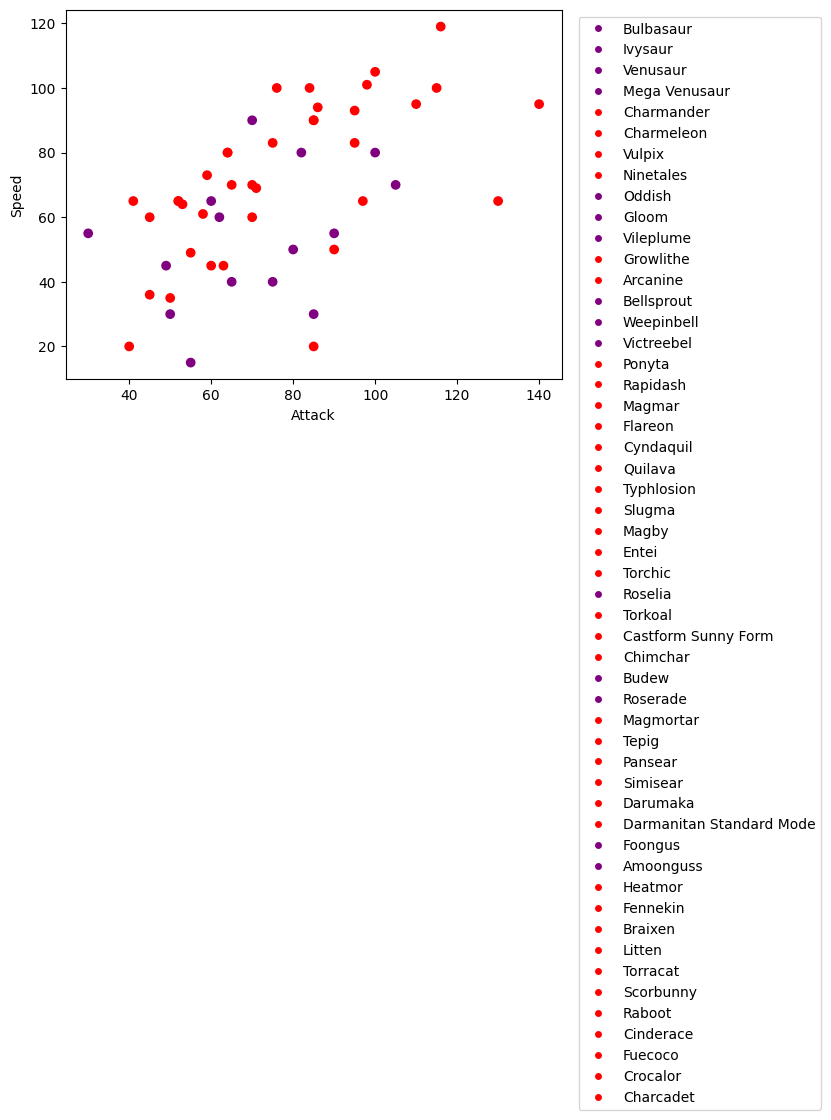

In [45]:
df_filtro = dfc[dfc['Types'].isin(['Grass Poison', 'Fire'])]

vec_attack = df_filtro['Attack'].tolist()
vec_speed = df_filtro['Speed'].tolist()
vec_names = df_filtro['Name'].tolist()
vec_types = df_filtro['Types'].tolist()

type_colors = {'Grass Poison': 'purple', 'Fire': 'red'}

scatter = plt.scatter(vec_attack, vec_speed, c=[type_colors[types] for types in vec_types])

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=name, markerfacecolor=type_colors[types])
                   for name, types in zip(vec_names, vec_types)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.xlabel('Attack')
plt.ylabel('Speed')

plt.show()